<a href="https://colab.research.google.com/github/ghaliac/Projet_NLP_Lyrics/blob/main/Copie_de_2024_project_Lyrics_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>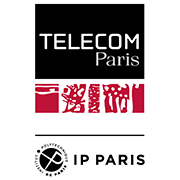</center>

<h1><center><strong><font color="chillipepper">IA 717: Lyrics Retrieval Project</font></strong></center></h1>
<h3><center><font color="blue"><strong>Student Version</strong></font></center></h3>

<center>
<h3> Project Supervisor <br/> Changhong Wang</h3>
<email>changhong.wang@telecom-paris.fr</email>
<br/>
Year 2024-2025
</center>

------------------------

# Task definition

Lyrics Retrieval is the process of automatically retrieving the lyrics of a song from a text database given a query, such as the song title, artist name, or a snippet of the lyrics. It is a typical music information retrieval task, commonly applied in music recommendation systems and karaoke applications.  


In this project, we will develop a basic lyrics retrieval system given a lyrics paragraph as query, as shown by the diagram below. It will include the following steps:  

- Pre-process the lyrics
- Extract representations (query $x$ and lyrics database $y_i$)
- Rule-based quick search to find potential candidates
- Compute metrics which measures the matching between the query and the candidates $d(x,y_i)$
- Obtain a ranked list of lyrics, where a higher rank for the ground truth indicates a better-performing system

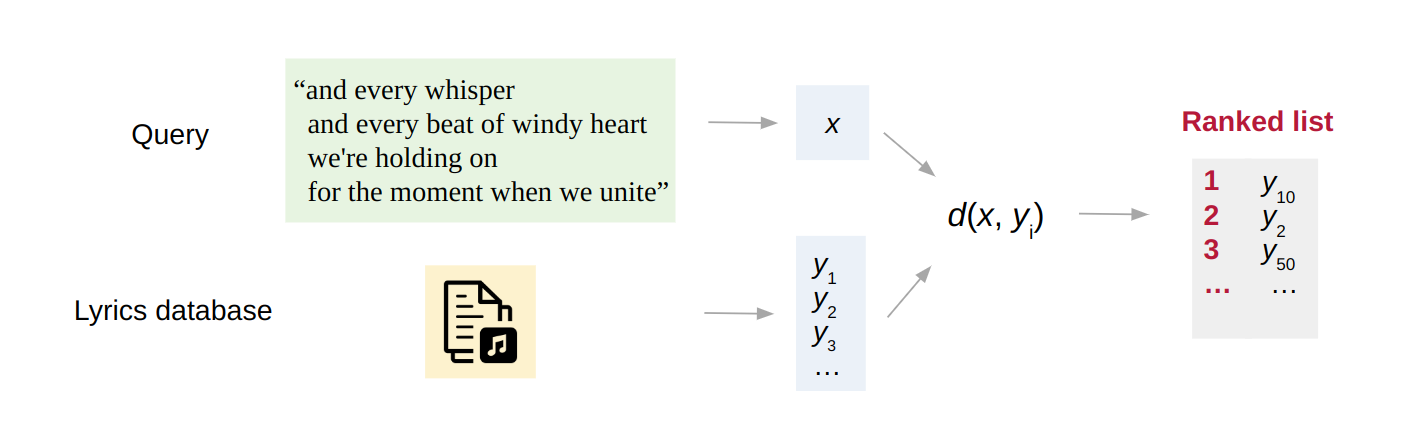

We will then further explore the following aspects:  

- How do different representations influence retrieval accuracy?
- Which paragraph are more important for retrieval, and why?
- What are the non-ground truth lyrics, and why do they appear in the top-k ranking?
- Can we do lyrics retrieval with a lyric line directly?

# Preprocessing

In [ ]:
# Install necessary packages
!pip install langdetect
!pip install ijson
!pip install json
!pip install glob

In [ ]:
# Import packages
from langdetect import detect
import json
import ijson
from glob import glob

## Dataset

We use two datasets:
- JamendoLyrics dataset: https://github.com/f90/jamendolyrics: 10 English songs.
- Wasabi dataset: https://zenodo.org/records/5603369: lyrics with more than 2 million songs.

We will the 10 English songs in the Wasabi dataset and provide the detailed meta information, including: title, artist, and full lyrics. Each time, we are allowed to use only one paragraph.

- Download both datasets
- For JamendoLyrics dataset, we are only allowed to use the lyric paragraph text in https://github.com/f90/jamendolyrics/tree/master/lyrics at the retrieving stage.
- For Wasabi dataset, all information we need is in `json/song.json`.

In [ ]:
# Download JamendoLyrics dataset
!wget https://github.com/f90/jamendolyrics/archive/refs/heads/master.zip

In [ ]:
# Download Wasabi dataset
!wget https://zenodo.org/records/5603369/files/wasabi-2-0.tar

In [ ]:
!unzip master.zip -d JamendoLyrics
!rm master.zip

In [ ]:
!mkdir Wasabi
!tar -xvf wasabi-2-0.tar -C Wasabi
!rm -r Wasabi/rdf/
!unzip Wasabi/json/json.zip -d Wasabi
!rm -r Wasabi/json/
!rm wasabi-2-0.tar

## Data exploration
Play with the dataset to see what's in the dataset.

In [ ]:
# Ouvrir le fichier JSON
with open('/content/Wasabi/song.json', 'r') as file:
    # Initialiser un générateur pour lire les éléments du fichier
    parser = ijson.items(file, 'item')  # 'item' ici fait référence aux éléments de premier niveau

    # Récupérer les 10 premiers éléments
    premiers_elements = []
    for i, element in enumerate(parser):
        if i < 10:
            premiers_elements.append(element)
        else:
            break  # On arrête après avoir récupéré 10 éléments

# Afficher les 10 premiers éléments
print(premiers_elements)


[{'_id': {'$oid': '5714dec325ac0d8aee3804e7'}, 'position': 0, 'lengthAlbum': '57:52', 'urlSong': 'http://lyrics.wikia.com/A:Turn_It_Up', 'lyrics': 'Turn it up<br>I don&apos;t know where you&apos;re plugging in<br>Listen up<br>Yeah, we&apos;re all set to begin<br>Turn it up<br>Because we hope you like it loud<br>Tune it up<br>Any second now<br>Making like<br>Cheeky Monkey grins<br>And for tonight<br>I&apos;d love to let you in', 'urlWikipedia': '', 'id_album': {'$oid': '5714debb25ac0d8aee34d59a'}, 'isClassic': False, 'urlAllmusic': 'http://www.allmusic.com/song/mt0013320473', 'urlMusicBrainz': 'http://musicbrainz.org/recording/3db608e4-eb72-437e-bc52-872f0a51434f', 'title': 'Turn It Up', 'publicationDateAlbum': '1997', 'albumTitle': 'How Ace Are Buildings', 'deezer_mapping': [[67354194, 'search-exact']], 'id_song_deezer': '67354194', 'isrc': 'GBAAP9700050', 'length': '93', 'explicitLyrics': False, 'rank': 261631, 'bpm': '77', 'gain': '-29.4', 'preview': 'http://e-cdn-preview-8.deezer.co

## Text normalization

The data is JamendoLyrics dataset is clean and no need for preprocessing. But we need to identify the English songs using langage detection tool: `langdetect`.


We need both language identification and text normalization for Wasabi dataset. It may include: nummbers to words, symbols to words, remove unnecessary symbols, remove non-lyrics, etc.

In [ ]:
# Identify the 10 English song in JamendoLyrics using language detection tools

In [ ]:
# Text normalization for Wasabi dataset
# enlever les majuscules
#remplacer les balises HTMS <br> = \n , &apost; = ' ...





# Lyrics Retrieval

## Representation extraction

### Byte-pair encoding

### Word2Vec

### Phoneme representation

## Quick search

To avoid comparing the query with all lyrics in the Wasabi dataset, we can quickly identify potential candidates by heurists, e.g. number of words in a line.

## Compute match

### Levenshtein distance

## Evaluation

# Exploration